In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
df_movies = pd.read_csv('../../data/cleanData/movies_cleaned.csv')
df_movies = df_movies.rename(columns={'name': 'original_title'})

df_movies.head(10)

,wiki_id,freebase_id,original_title,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,NaN,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,NaN,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,NaN,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,NaN,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,NaN,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [16]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wiki_id         81741 non-null  int64  
 1   freebase_id     81741 non-null  object 
 2   original_title  81741 non-null  object 
 3   release_date    39372 non-null  object 
 4   revenue         8401 non-null   float64
 5   runtime         61291 non-null  float64
 6   languages       81741 non-null  object 
 7   countries       81741 non-null  object 
 8   genres          81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


# Data importation

## Additional movie data from Kaggle

In [17]:
df_movies_additional = pd.read_csv('../../data/additionalData/Kaggle_movie_data_tmbd.csv', sep='|')
df_movies_additional.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,directors
0,False,/zjLR7DbWujKiG7VhtjQ4r3gsjou.jpg,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,43000.0,tt0055827,fr,Le Caporal épinglé,...,90.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,The Elusive Corporal,False,5.9,10.0,"[{'cast_id': 3, 'character': 'Caporal', 'credi...","[{'credit_id': '52fe4626c3a36847f80ef68b', 'de..."
1,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,43001.0,tt0055910,fr,Cybèle ou les dimanches de ville d'Avray,...,110.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Sundays and Cybele,False,7.4,28.0,"[{'cast_id': 4, 'character': 'Pierre', 'credit...","[{'credit_id': '52fe4626c3a36847f80ef6c7', 'de..."


In [4]:
df_movies_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119938 entries, 0 to 119937
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  119938 non-null  object 
 1   backdrop_path          67084 non-null   object 
 2   belongs_to_collection  9488 non-null    object 
 3   budget                 119394 non-null  object 
 4   genres                 119394 non-null  object 
 5   homepage               20134 non-null   object 
 6   id                     119394 non-null  float64
 7   imdb_id                114477 non-null  object 
 8   original_language      119394 non-null  object 
 9   original_title         119394 non-null  object 
 10  overview               116539 non-null  object 
 11  popularity             119073 non-null  object 
 12  poster_path            119073 non-null  object 
 13  production_companies   119073 non-null  object 
 14  production_countries   119073 non-nu

## Inflation dataset from Kaggle

In [5]:
df_inflation_additional = pd.read_csv('../../data/additionalData/Kaggle_US_CPI.csv')
df_inflation_additional.head(2)

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8


In [6]:
df_inflation_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Yearmon  1296 non-null   object 
 1   CPI      1296 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.4+ KB


## Title Basics from IMDb

In [7]:
df_title_additional = pd.read_csv('../../data/additionalData/IMDb_title.basics.tsv.gz', sep='\t')
df_title_additional = df_title_additional.rename(columns={'tconst': 'imdb_id'})
df_title_additional = df_title_additional.rename(columns={'originalTitle': 'original_title'})
df_title_additional.head(2)

C:\Users\aurel\AppData\Local\Temp\ipykernel_7860\3187453321.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_additional = pd.read_csv('../../data/additionalData/IMDb_title.basics.tsv.gz', sep='\t')


,imdb_id,titleType,primaryTitle,original_title,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


In [8]:
df_title_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11228162 entries, 0 to 11228161
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   imdb_id         object
 1   titleType       object
 2   primaryTitle    object
 3   original_title  object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 771.0+ MB


## Title Ratings from IMDb

In [18]:
df_rating_additional = pd.read_csv('../../data/additionalData/IMDb_title.ratings.tsv.gz', sep='\t')
df_rating_additional = df_rating_additional.rename(columns={'tconst': 'imdb_id'})
df_rating_additional.head(2)

,imdb_id,averageRating,numVotes
0,tt0000001,5.7,2099
1,tt0000002,5.6,282


In [19]:
df_rating_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497560 entries, 0 to 1497559
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   imdb_id        1497560 non-null  object 
 1   averageRating  1497560 non-null  float64
 2   numVotes       1497560 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.3+ MB


# Data preprocessing

## Additional movie data from Kaggle

# Data statistics overview

In [12]:
from matplotlib_venn import venn2

def intersectionIMDbID(df1, df2, name1, name2, id_column='id'):
    # Ids extraction from each DataFrame
    ids1 = set(df1[id_column].unique())
    ids2 = set(df2[id_column].unique())
    
    # Compute intersection and differences
    intersection = ids1 & ids2
    only_df1 = ids1 - ids2
    only_df2 = ids2 - ids1
    
    # Count elements
    count_intersection = len(intersection)
    count_only_df1 = len(only_df1)
    count_only_df2 = len(only_df2)
    total = count_intersection + count_only_df1 + count_only_df2

    # Venn diagram
    venn = venn2(subsets=(1, 1, 1), set_labels=(name1, name2))
    
    # Add counts
    venn.get_label_by_id('10').set_text(f'{count_only_df1}')
    venn.get_label_by_id('01').set_text(f'{count_only_df2}')
    venn.get_label_by_id('11').set_text(f'{count_intersection}')
    
    plt.title("Intersection between " + name1 + " and " + name2)
    plt.show()

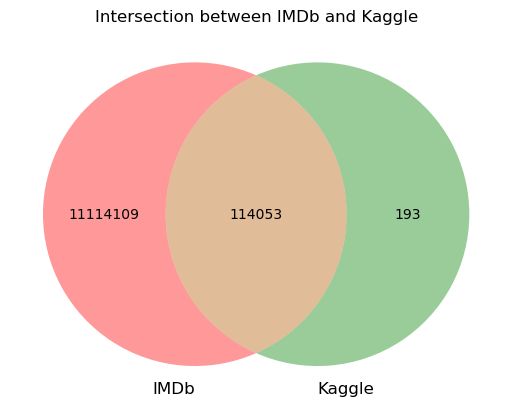

In [13]:
intersectionIMDbID(df_title_additional, df_movies_additional, 'IMDb', 'Kaggle', id_column='imdb_id')

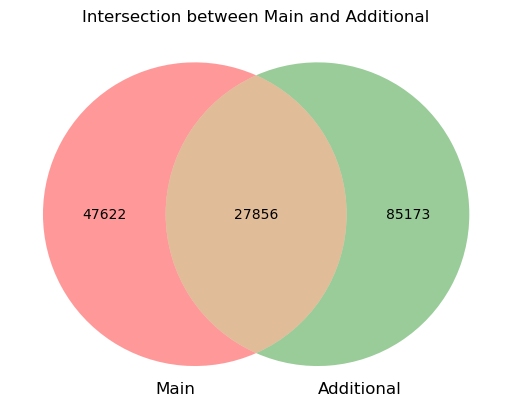

In [14]:
intersectionIMDbID(df_movies, df_movies_additional, 'Main', 'Additional', id_column='original_title')

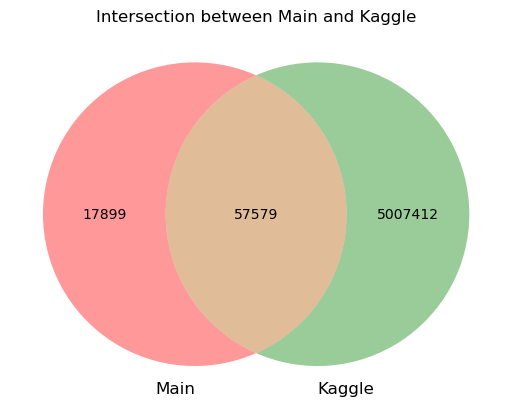

In [15]:
intersectionIMDbID(df_movies, df_title_additional, 'Main', 'Kaggle', id_column='original_title')

In [21]:
from SPARQLWrapper import SPARQLWrapper, JSON

In [30]:
# Initialiser le point d'accès SPARQL de Wikidata
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
sparql.setUserAgent("YourAppName/1.0 (your.email@example.com)")


AttributeError: 'SPARQLWrapper' object has no attribute 'setUserAgent'

In [ ]:
# Exemple de liste d'ID Freebase à rechercher
freebase_ids = ['/m/03vyhn', '/m/08yl5d', '/m/0crgdbh']  # Remplacez par vos propres IDs Freebase

In [28]:
# Créer la requête SPARQL dynamique pour récupérer les ID IMDb
freebase_values = " ".join(f'"{freebase_id}"' for freebase_id in freebase_ids)
query = f"""
SELECT ?freebase_id ?imdb_id WHERE {{
  VALUES ?freebase_id {{{freebase_values}}}
  ?item wdt:P646 ?freebase_id;
        wdt:P345 ?imdb_id.
}}
"""

In [29]:
# Configurer et exécuter la requête
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

HTTPError: HTTP Error 403: Forbidden

In [ ]:
# Extraire les résultats et les organiser en DataFrame
data = []
for result in results["results"]["bindings"]:
    freebase_id = result["freebase_id"]["value"]
    imdb_id = result["imdb_id"]["value"]
    data.append({"Freebase ID": freebase_id, "IMDb ID": imdb_id})

df = pd.DataFrame(data)
print(df)


HTTPError: HTTP Error 403: Forbidden

In [31]:
import requests

In [ ]:
# Point d'accès SPARQL de Wikidata
url = "https://query.wikidata.org/sparql"

# Exemple de liste d'ID Freebase à rechercher
freebase_ids = df_movies['freebase_id'].tolist()  # Remplacez par vos propres IDs Freebase

# Créer la requête SPARQL dynamique pour récupérer les ID IMDb
freebase_values = " ".join(f'"{freebase_id}"' for freebase_id in freebase_ids)
query = f"""
SELECT ?freebase_id ?imdb_id WHERE {{
  VALUES ?freebase_id {{{freebase_values}}}
  ?item wdt:P646 ?freebase_id;
        wdt:P345 ?imdb_id.
}}
"""

# En-têtes de requête, y compris un User-Agent personnalisé
headers = {
    "User-Agent": "YourAppName/1.0 (your.email@example.com)",
    "Accept": "application/sparql-results+json"
}

# Exécuter la requête avec requests
response = requests.get(url, params={'query': query, 'format': 'json'}, headers=headers)

# Vérifier que la requête a réussi
if response.status_code == 200:
    results = response.json()

    # Extraire les résultats et les organiser en DataFrame
    data = []
    for result in results["results"]["bindings"]:
        freebase_id = result["freebase_id"]["value"]
        imdb_id = result["imdb_id"]["value"]
        data.append({"Freebase ID": freebase_id, "IMDb ID": imdb_id})

    df = pd.DataFrame(data)
    print(df)
else:
    print("Erreur lors de la requête :", response.status_code)


  Freebase ID    IMDb ID
0   /m/03vyhn  tt0228333
1  /m/0crgdbh  tt0094806
2   /m/08yl5d  tt0245916


In [44]:
test1 = df[df_movies_additional['imdb_id'] == 'tt0228333']
test1.head()

C:\Users\aurel\AppData\Local\Temp\ipykernel_7860\676612236.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test1 = df[df_movies_additional['imdb_id'] == 'tt0228333']


,Freebase ID,IMDb ID


In [46]:
test2 = df[df_movies_additional['original_title'] == 'Brun bitter']
test2.head()

C:\Users\aurel\AppData\Local\Temp\ipykernel_7860\4283842569.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test2 = df[df_movies_additional['original_title'] == 'Brun bitter']


,Freebase ID,IMDb ID


In [48]:
df_movies['freebase_id'].tolist()

['/m/03vyhn',
 '/m/08yl5d',
 '/m/0crgdbh',
 '/m/0285_cd',
 '/m/01mrr1',
 '/m/03cfc81',
 '/m/04jcqvw',
 '/m/02qc0j7',
 '/m/06_y2j7',
 '/m/075f66',
 '/m/017n1p',
 '/m/07kjkz6',
 '/m/0gffwj',
 '/m/016ywb',
 '/m/04cqrs4',
 '/m/02r52hc',
 '/m/0g5qvzg',
 '/m/0kcn7',
 '/m/0gyryjt',
 '/m/0gj30jx',
 '/m/017n1b',
 '/m/02wjqm',
 '/m/05p45cv',
 '/m/0h964n1',
 '/m/0g4_n3m',
 '/m/047t9rb',
 '/m/05pckh0',
 '/m/0523t_1',
 '/m/05f5_5y',
 '/m/014k4y',
 '/m/02rc_h4',
 '/m/02pml15',
 '/m/0gjd9q4',
 '/m/04j284s',
 '/m/0gg5xnj',
 '/m/04j0lfk',
 '/m/04wy0v',
 '/m/0fq260_',
 '/m/0b6c_nw',
 '/m/0bh9fbk',
 '/m/06_y54s',
 '/m/02pjlrp',
 '/m/0gyv1h1',
 '/m/0f400r',
 '/m/02q74ng',
 '/m/0734w5',
 '/m/07h9zj',
 '/m/0b6kc_5',
 '/m/03cfwy4',
 '/m/01mrrd',
 '/m/05c4bry',
 '/m/03grb4v',
 '/m/03c_x01',
 '/m/02vlsqt',
 '/m/0cws46',
 '/m/05b0lk8',
 '/m/03c0d85',
 '/m/02rm6l8',
 '/m/05f6kpj',
 '/m/06_vg9f',
 '/m/0f0d1p',
 '/m/02vn81r',
 '/m/0kv1zq',
 '/m/09rzk6',
 '/m/0dll97s',
 '/m/04x8zs',
 '/m/05bzp6g',
 '/m/04m_wkg',
 '

In [49]:

# Point d'accès SPARQL de Wikidata
url = "https://query.wikidata.org/sparql"

# Créer une liste pour stocker les IMDb IDs correspondants
imdb_ids = []

# Parcourir chaque freebase_id dans df_movies et effectuer une requête pour obtenir l'IMDb ID
for freebase_id in df_movies["freebase_id"]:
    # Créer la requête SPARQL pour chaque freebase_id
    query = f"""
    SELECT ?imdb_id WHERE {{
      ?item wdt:P646 "{freebase_id}";
            wdt:P345 ?imdb_id.
    }}
    """

    # En-têtes de requête, y compris un User-Agent personnalisé
    headers = {
        "User-Agent": "YourAppName/1.0 (your.email@example.com)",
        "Accept": "application/sparql-results+json"
    }

    # Exécuter la requête avec requests
    response = requests.get(url, params={'query': query, 'format': 'json'}, headers=headers)
    
    # Vérifier que la requête a réussi
    if response.status_code == 200:
        results = response.json()
        # Extraire l'IMDb ID si disponible, sinon mettre None
        if results["results"]["bindings"]:
            imdb_id = results["results"]["bindings"][0]["imdb_id"]["value"]
        else:
            imdb_id = None
    else:
        print(f"Erreur lors de la requête pour Freebase ID {freebase_id}: {response.status_code}")
        imdb_id = None

    # Ajouter l'IMDb ID ou None à la liste
    imdb_ids.append(imdb_id)

# Ajouter la liste des IMDb IDs en tant que nouvelle colonne dans le DataFrame
df_movies["imdb_id"] = imdb_ids

# Afficher le DataFrame avec la nouvelle colonne "imdb_id"
df_movies.head(10)


KeyboardInterrupt: 